In [13]:
import pandas
import os
import matplotlib.pyplot as plt
import sklearn.metrics
import seaborn as sns
import numpy as np

In [46]:
data = pandas.read_csv('RFW_cosine_scores.csv')

asian_data = data[data['ethnicity'] == 'Asian']
indian_data = data[data['ethnicity'] == 'Indian']
caucasian_data = data[data['ethnicity'] == 'Caucasian']
african_data = data[data['ethnicity'] == 'African']


# Violin plots

In the same manner as another paper, it is nice to have violin plots in order to see the groupings of scores according to whether the pairs are positive or negative. 

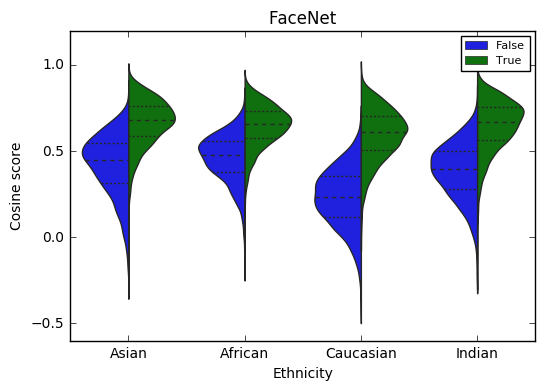

In [17]:
sns.violinplot(x = "ethnicity",hue="same", y="facenet",split=True,data=data, scale="count", inner="quartile")
plt.legend(loc = 'best',prop={'size': 8})
plt.xlabel('Ethnicity')
plt.ylabel('Cosine score')
plt.title('FaceNet')
plt.show()

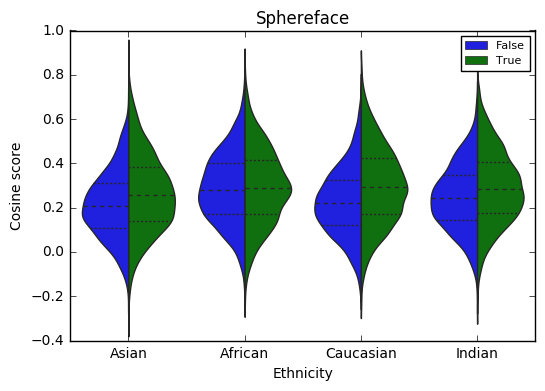

In [18]:
sns.violinplot(x = "ethnicity",hue="same", y="sphereface", split=True,data=data, scale="count", inner="quartile")
plt.legend(loc = 'best',prop={'size': 8})
plt.xlabel('Ethnicity')
plt.ylabel('Cosine score')
plt.title('Sphereface')
plt.show()

In [82]:
def plot_thr_fpr_facenet(data,desired_fpr):
    fpr,tpr,thresh = sklearn.metrics.roc_curve(y_true = data['same'],y_score = data['facenet'],pos_label = True)
    plt.plot(thresh,fpr)
    
    idxs = fpr >= desired_fpr
    return thresh[idxs][0]

def plot_roc_facenet(data,desired_fpr):
    fpr,tpr,thresh = sklearn.metrics.roc_curve(y_true = data['same'],y_score = data['facenet'],pos_label = True)
    plt.plot(fpr,tpr)
    
    idxs = fpr >= desired_fpr
    return thresh[idxs][0]

def plot_thr_fpr_sphereface(data,desired_fpr):
    fpr,tpr,thresh = sklearn.metrics.roc_curve(y_true = data['same'],y_score = data['sphereface'],pos_label = True)
    plt.plot(thresh,fpr)
    
    idxs = fpr >= desired_fpr
    return thresh[idxs][0]


def plot_roc_sphereface(data,desired_fpr):
    fpr,tpr,thresh = sklearn.metrics.roc_curve(y_true = data['same'],y_score = data['sphereface'],pos_label = True)
    plt.plot(fpr,tpr)
    
    idxs = fpr >= desired_fpr
    return thresh[idxs][0]

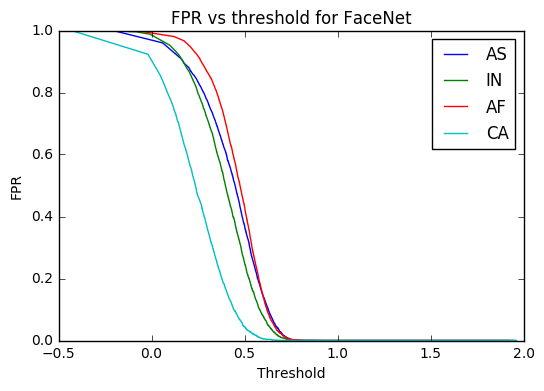

[0.56920802593231201, 0.52378082275390625, 0.57559394836425781, 0.3781678974628449]


In [80]:
desired_fpr = 0.2

asian_thresh = plot_thr_fpr_facenet(asian_data,desired_fpr)
indian_thresh=plot_thr_fpr_facenet(indian_data,desired_fpr)
african_thresh= plot_thr_fpr_facenet(african_data,desired_fpr)
cauc_thresh =plot_thr_fpr_facenet(caucasian_data,desired_fpr)

threshs = [asian_thresh,indian_thresh,african_thresh,cauc_thresh]
plt.title('FPR vs threshold for FaceNet')
plt.xlabel('Threshold')
plt.ylabel('FPR')
plt.legend(['AS','IN','AF','CA'])
plt.show()

print(threshs)

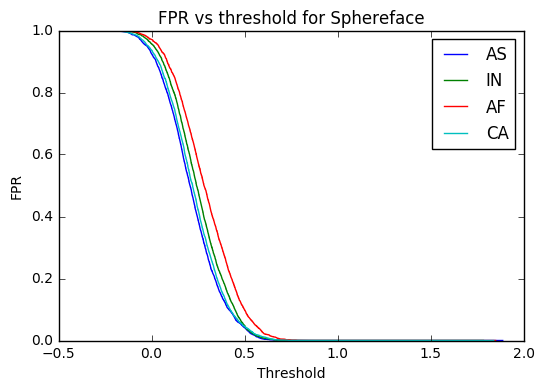

[0.33952760696411127, 0.37840446829795837, 0.4303627610206604, 0.35221993923187256]


In [81]:
desired_fpr = 0.2

asian_thresh = plot_thr_fpr_sphereface(asian_data,desired_fpr)
indian_thresh=plot_thr_fpr_sphereface(indian_data,desired_fpr)
african_thresh= plot_thr_fpr_sphereface(african_data,desired_fpr)
cauc_thresh =plot_thr_fpr_sphereface(caucasian_data,desired_fpr)

threshs = [asian_thresh,indian_thresh,african_thresh,cauc_thresh]
plt.title('FPR vs threshold for Sphereface')
plt.xlabel('Threshold')
plt.ylabel('FPR')
plt.legend(['AS','IN','AF','CA'])
plt.show()

print(threshs)


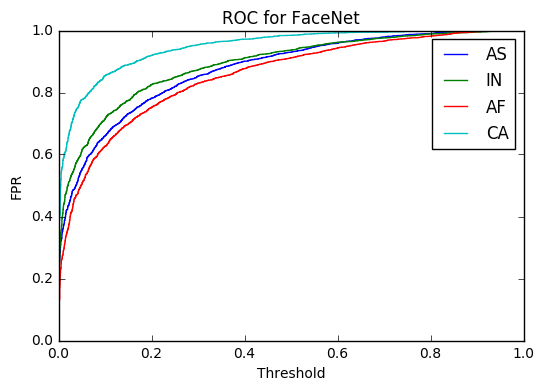

[0.56920802593231201, 0.52378082275390625, 0.57559394836425781, 0.3781678974628449]


In [87]:
desired_fpr = 0.2

asian_thresh = plot_roc_facenet(asian_data,desired_fpr)
indian_thresh=plot_roc_facenet(indian_data,desired_fpr)
african_thresh= plot_roc_facenet(african_data,desired_fpr)
cauc_thresh =plot_roc_facenet(caucasian_data,desired_fpr)

threshs = [asian_thresh,indian_thresh,african_thresh,cauc_thresh]
plt.title('ROC for FaceNet')
plt.xlabel('Threshold')
plt.ylabel('FPR')
plt.legend(['AS','IN','AF','CA'])
plt.show()

print(threshs)

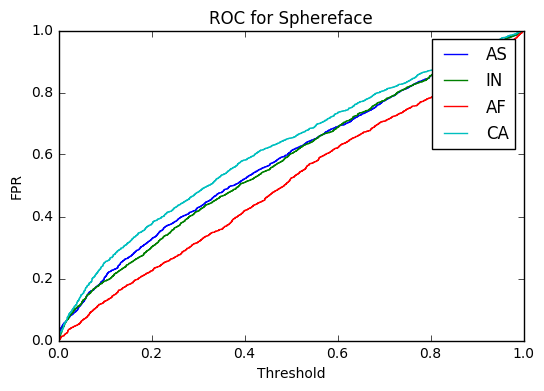

[0.33952760696411127, 0.37840446829795837, 0.4303627610206604, 0.35221993923187256]


In [86]:
desired_fpr = 0.2

asian_thresh = plot_roc_sphereface(asian_data,desired_fpr)
indian_thresh=plot_roc_sphereface(indian_data,desired_fpr)
african_thresh= plot_roc_sphereface(african_data,desired_fpr)
cauc_thresh =plot_roc_sphereface(caucasian_data,desired_fpr)

threshs = [asian_thresh,indian_thresh,african_thresh,cauc_thresh]
plt.title('ROC for Sphereface')
plt.xlabel('Threshold')
plt.ylabel('FPR')
plt.legend(['AS','IN','AF','CA'])
plt.show()

print(threshs)